# Online Retail Exploratory Data Analysis with Python

## Task 1: Import Required Libraries

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  # Import ticker for formatting

## Task 2: Load the Data

In [117]:
df = pd.read_excel('Online_Retail.xlsx')

## Task 3: Data Validation

In [118]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [120]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


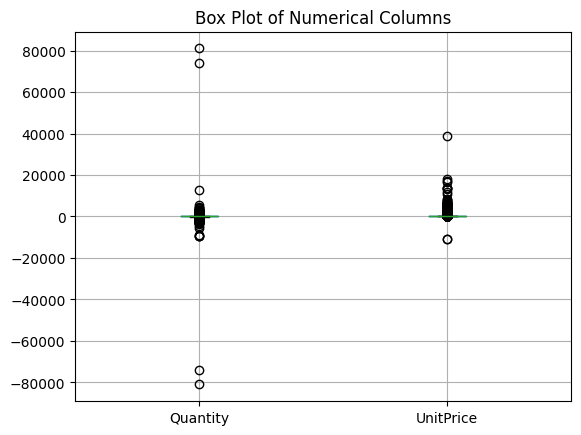

In [121]:
df[['Quantity', 'UnitPrice']].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.show()

## Task 3a: Data Cleaning

Original Count: 541909
Count after dealing with negative values: 530104
Count after dealing with missing values: 397884
Count after dealing with duplicates rows: 392692



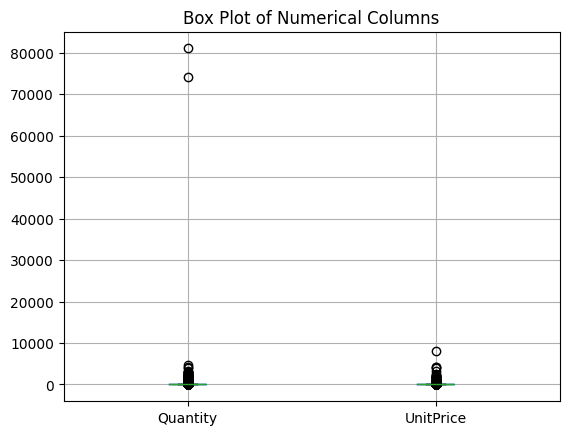

In [122]:
print(f'Original Count: {df.shape[0]}')

df_filtered = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)] # Removing rows based on Quantity and UnitPrice negative values
print(f'Count after dealing with negative values: {df_filtered.shape[0]}')

df_filtered = df_filtered.dropna(subset=['CustomerID']) # Removing rows base on CustomerID missing values
print(f'Count after dealing with missing values: {df_filtered.shape[0]}')

df_filtered = df_filtered.drop_duplicates() # Removing duplicates rows
print(f'Count after dealing with duplicates rows: {df_filtered.shape[0]}\n')

df_filtered[['Quantity', 'UnitPrice']].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.show()

## Task 3b: Dealing with Outliers

In [123]:
lower_bound= df_filtered[['Quantity','UnitPrice']].quantile(0.01)
upper_bound = df_filtered[['Quantity','UnitPrice']].quantile(0.99)

no_outliers_df = df_filtered[
    (df_filtered['UnitPrice'].between(lower_bound['UnitPrice'], upper_bound['UnitPrice'])) &
    (df_filtered['Quantity'].between(lower_bound['Quantity'], upper_bound['Quantity']))
]
no_outliers_df.info()
no_outliers_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 382280 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    382280 non-null  object        
 1   StockCode    382280 non-null  object        
 2   Description  382280 non-null  object        
 3   Quantity     382280 non-null  int64         
 4   InvoiceDate  382280 non-null  datetime64[ns]
 5   UnitPrice    382280 non-null  float64       
 6   CustomerID   382280 non-null  float64       
 7   Country      382280 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.2+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,382280.000000,382280,382280.000000,382280.000000
mean,9.854761,2011-07-10 14:23:00.146280192,2.749987,15296.566653
min,1.000000,2010-12-01 08:26:00,0.210000,12347.000000
25%,2.000000,2011-04-06 14:53:00,1.250000,13969.000000
50%,6.000000,2011-07-31 11:38:00,1.950000,15159.000000
75%,12.000000,2011-10-20 12:57:00,3.750000,16795.000000
max,120.000000,2011-12-09 12:50:00,14.950000,18287.000000
std,14.394253,NaN,2.545306,1710.103376


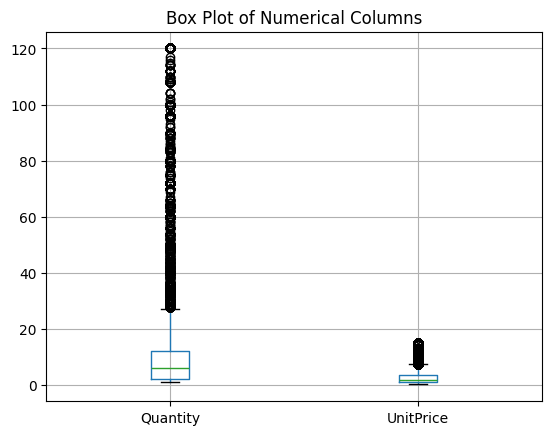

In [124]:
no_outliers_df[['Quantity', 'UnitPrice']].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.show()

## Task 4: Data Formating

In [125]:
df1 = no_outliers_df.drop(['StockCode'], axis=1) # Drop Irrelevant "StockCode" column
df1 = df1.rename(columns={'Description': 'Product_Description'}) # Rename "Description" column
df1['TotalSales'] = df1['Quantity'] * df1['UnitPrice'] # Calculating TotalSales = Quantity * UnitPrice
df1['Month_Name'] = df1['InvoiceDate'].dt.month_name() # Adding "Month_Name" column
df1['CustomerID'] = df1['CustomerID'].astype(int) # Converting "CustomerID" column to integer
df1.head()

,InvoiceNo,Product_Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month_Name
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,December
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,December
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,December


## Task 5a: Analizing the Data (Sales Summary)

In [126]:
total_sales = df1["TotalSales"].sum() # Total Sales
total_transactions = df1["InvoiceNo"].nunique() # Total number of transactions
avg_order_value = total_sales / total_transactions # Average order value

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Transactions: {total_transactions}")
print(f"Average Order Value: ${avg_order_value:,.2f}")

Total Sales: $6,883,273.81
Total Transactions: 17972
Average Order Value: $383.00


## Task 5b: Analizing the Data (Customer Analysis)

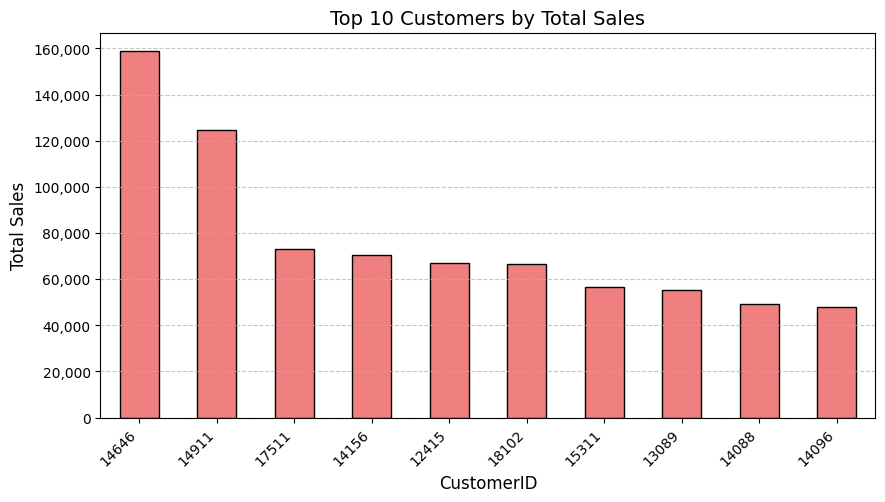

In [127]:
# Top 10 customers by total sales
top_countries = df1.groupby('CustomerID')['TotalSales'].sum().nlargest(10)

# Create plot
plt.figure(figsize=(10, 5))
ax = top_countries.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Top 10 Customers by Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Format Y-axis to show normal numbers (no scientific notation)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Adds commas for large numbers

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Task 5c: Analizing the Data (Best-Selling Products)

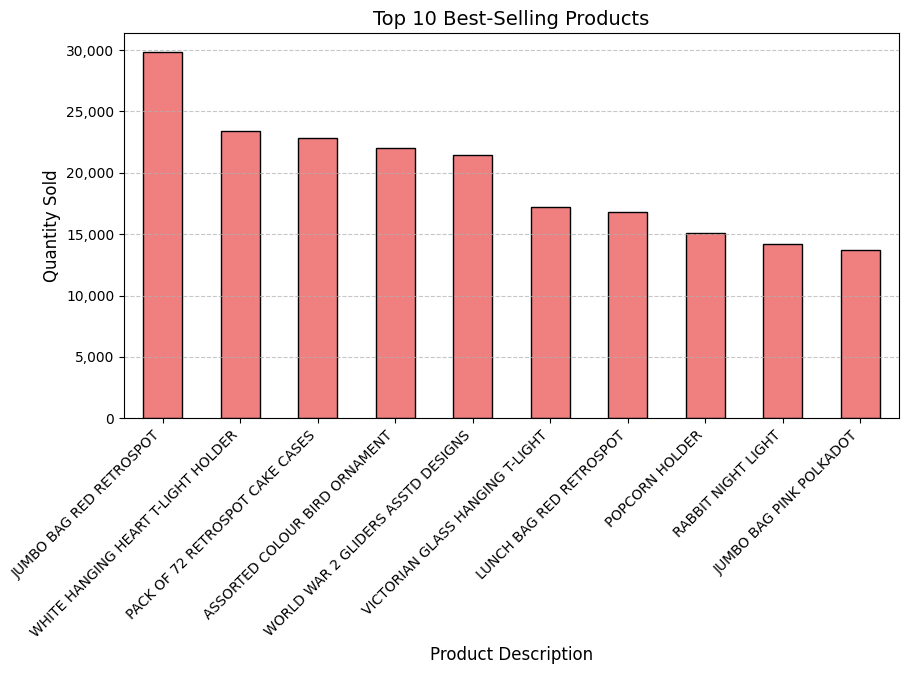

In [128]:
# Top 10 Selling Products by Quantity Sold
top_products = df1.groupby('Product_Description')['Quantity'].sum().nlargest(10)

# Create plot
plt.figure(figsize=(10, 5))
ax = top_products.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.title('Top 10 Best-Selling Products', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Format Y-axis to show normal numbers (no scientific notation)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Adds commas for large numbers

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Task 5d: Analizing the Data (Sales by Country)

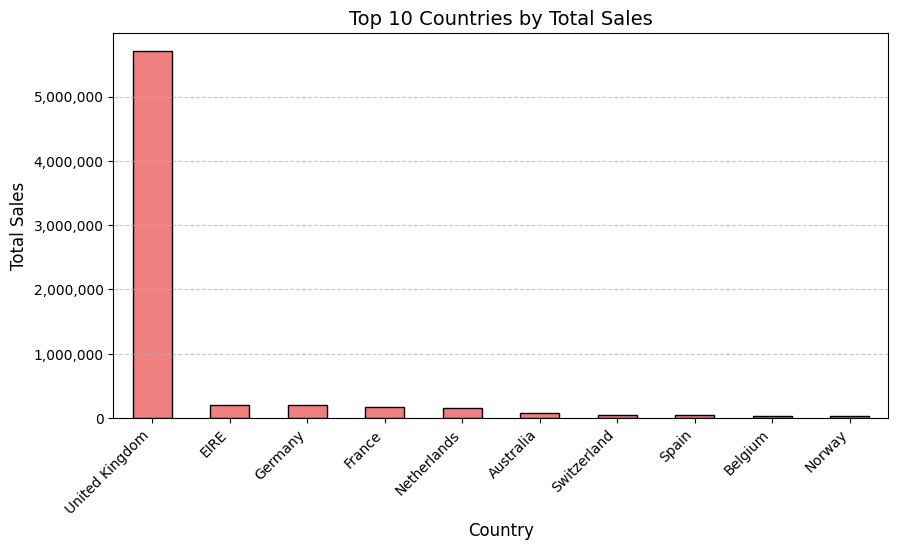

In [129]:
# Top 10 countries by total sales
top_countries = df1.groupby('Country')['TotalSales'].sum().nlargest(10)

# Create plot
plt.figure(figsize=(10, 5))
ax = top_countries.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Top 10 Countries by Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Format Y-axis to show normal numbers (no scientific notation)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Adds commas for large numbers

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Task 5d: Analizing the Data (Sales Trend Over Time)

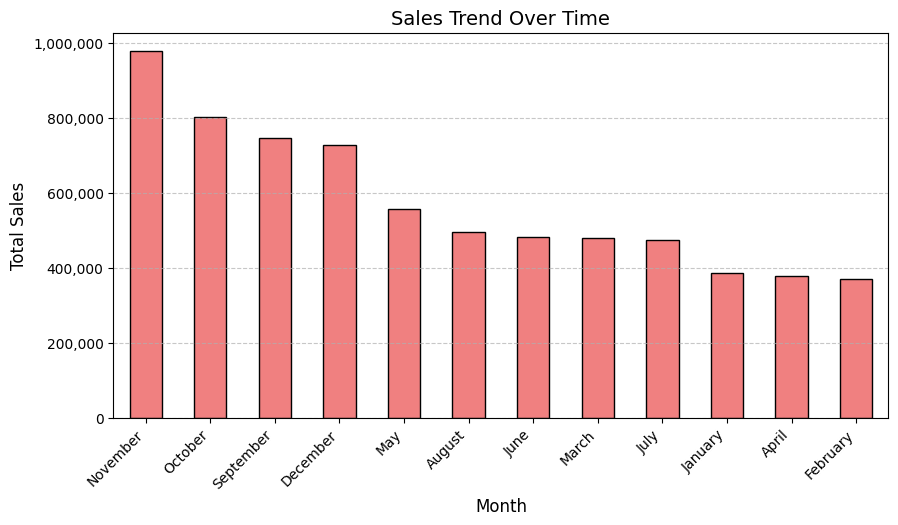

In [130]:
# Top 10 countries by total sales
top_countries = df1.groupby('Month_Name')['TotalSales'].sum().nlargest(12)

# Create plot
plt.figure(figsize=(10, 5))
ax = top_countries.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Sales Trend Over Time', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Format Y-axis to show normal numbers (no scientific notation)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Adds commas for large numbers

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()